###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018 D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())

# Equidistant Cartesian grid

In [lecture 1](https://github.com/daniel-koehn/Theory-of-seismic-waves-II/tree/master/01_Analytical_solutions) we reviewed the forward problems to describe wave propagation in isotropic elastic and acoustic media. Furthermore, analytical solutions for homogeneous 3D, 2D and 1D acoustic media are derived to verify the accuarcy of the finite difference codes we develop later in the course.

Before introducing the basics of finite-difference modelling, I want to give an overview of some concepts to generate discrete subsurface models.

## From the continous to discrete world  

The partial differential equations, which we developed before describe wave propagation in a continous medium. However, if we want to solve these equations in a computer, we have to discretize the continuum, due to the limitation that a computer can only compute discrete problems. The question is how fine do we have to discretize the continuum in order to get accurately seismic modelling results?

Do we have to discretize down to the molecular scale? For example 12 grams of the carbon isotop C-12 contains $6.022140857x10^{23}$ atoms. Let's assume that we can represent the coordinates of the atoms in each direction by a double precision floating-point number which requires 8 Byte, so in totally we need ...

In [2]:
memory_mole_c12 = 6.022140857e23 * 3 * 8 * 1e-12
print ("Memory required = ", memory_mole_c12, " TB")

Memory required =  14453138056800.0  TB


$1.4x10^{13}$ TB would lead to some serious memory problems when using such a fine mesh, because the [NEC-cluster](https://www.rz.uni-kiel.de/de/angebote/hiperf/nec-linux-cluster) at the computing centre at Christian-Albrechts-University Kiel only has a total of 40 TB of RAM. We have not even considered the required runtime for such a seismic modelling run.

Fortunately, we do not have to discretize the universe down to the atomic or moleculare scale in order to get reasonable modelling results. In a later lecture, we will derive criteria to find the best compromise between accuracy of the modelling results and level of model discretization.

## Discretization of a 2D model

Let's start with the 2D acoustic wave equation:

\begin{equation}
\frac{\partial^2 P(x,z,t)}{\partial t^2} - Vp^2(x,z) \biggl(\frac{\partial^2 P(x,z,t)}{\partial x^2} + \frac{\partial^2 P(x,z,t)}{\partial z^2} \biggl)= f \nonumber
\end{equation}

In a first step to solve this problem using finite-differences we have to discretize the pressure wavefield $P(x,z,t)$ and $V_{p0}(x,z)$ at a specific time t on a **equidistant 2D Cartesian spatial grid**:

<img src="images/2D-grid_cart_ac.png" width="75%">

where we define the positions (x,z) of the discrete points in the model by

\begin{align}
x &= i*dh,\nonumber \\
z &= j*dh,\nonumber \\
\end{align}

where $dh$ is the spatial grid point distance. We denote the value of the pressure wavefield and P-wave velocity at a discrete point by $P_{j,i}$ and $Vp_{j,i}$, respectively. These are 2D matrices, so we can simply store them in 2D arrays. Let's try to do this in Python.

In [2]:
# Import Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Here, I introduce a new library, which is useful 
# to define the fonts and size of a figure in a notebook
from pylab import rcParams

# Get rid of a Matplotlib deprecation warning
import warnings
warnings.filterwarnings("ignore")

We want to discretize a homogeneous subsurface model with x = 1000 m and z = 500 m and a spatial grid point distance dh = 50 m.

In [3]:
# Define FD grid parameters
dh = 50.0
Xmax = 1000.0
Zmax = 500.0

In [4]:
# Define no. of grid points in x- and z-direction and grid point coordinates
def coord_def(Xmax,Zmax,dh):
    
    # number of grid points in x- and z-direction
    NX = (int)(Xmax / dh)
    NZ = (int)(Zmax / dh)
    
    print("NX = ",NX)
    print("NZ = ",NZ)
    
    # x- and z-coordinates of the discrete Cartesian grid points
    x = np.arange(0, (NX+1)*dh, dh)
    z = np.arange(0, (NZ+1)*dh, dh)
    
    XX, ZZ = np.meshgrid(x, z)
    
    return NX, NZ, x, z, XX, ZZ

NX =  20
NZ =  10


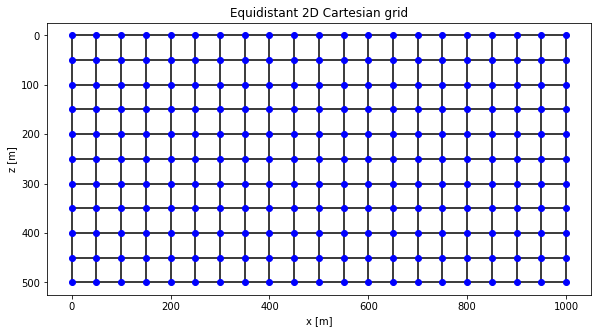

In [5]:
# Define figure size
rcParams['figure.figsize'] = 12, 5

# Calculate coordinates of grid points
NX, NZ, x, z, XX, ZZ = coord_def(Xmax,Zmax,dh)

# Plot Cartesian mesh
plt.plot(XX, ZZ, 'k')
plt.plot(XX.T, ZZ.T, 'k')

# Plot grid points
plt.plot(XX, ZZ, 'bo')

plt.title("Equidistant 2D Cartesian grid" )
plt.xlabel("x [m]")
plt.ylabel("z [m]")
plt.axes().set_aspect('equal')
plt.gca().invert_yaxis()
plt.show()

Nice, next we create and visualize a homogeneous Vp-model discretized on this Cartesian grid.

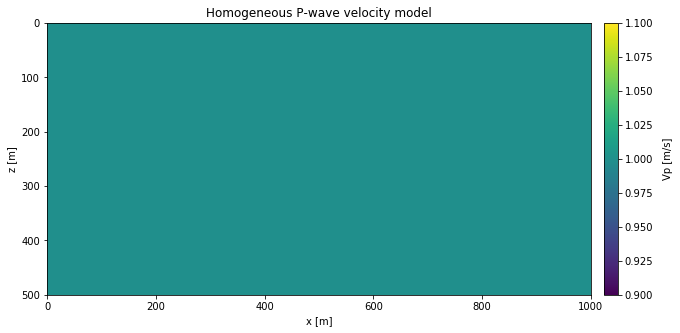

In [6]:
# Define P-wave velocity for homogeneous medium
vp0 = 1.0 # Vp [m/s]
vp = vp0*np.ones((NZ+1,NX+1))

# Plot Vp-model
cax = plt.imshow(vp,extent=[x[0],x[-1],z[0],z[-1]], origin='lower')
plt.title("Homogeneous P-wave velocity model" )
plt.xlabel("x [m]")
plt.ylabel("z [m]")
cbar = plt.colorbar(cax, orientation='vertical', pad=0.02)
cbar.set_label('Vp [m/s]', labelpad=10)
plt.gca().invert_yaxis()
plt.show()

Hmm, looks a little bit boring, so let's build a more interesting model - e.g. a layer over a half-space:

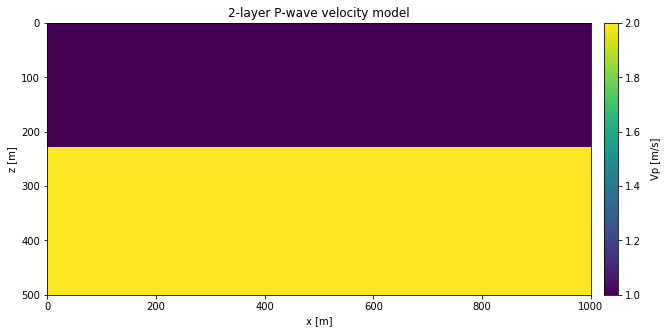

In [7]:
# Define P-wave velocity for homogeneous medium
vp1 = 2.0 # Vp in half-space [m/s]

# Add half-space to model
vp_2layer = vp

vp_2layer[int((NZ+1)/2):NZ+1,:] = vp1

# Plot Vp-model
cax = plt.imshow(vp_2layer,extent=[x[0],x[-1],z[0],z[-1]], origin='lower')
plt.title("2-layer P-wave velocity model" )
plt.xlabel("x [m]")
plt.ylabel("z [m]")
cbar = plt.colorbar(cax, orientation='vertical', pad=0.02)
cbar.set_label('Vp [m/s]', labelpad=10)
plt.gca().invert_yaxis()
plt.show()

... or an even more complex layer interface:

In [8]:
# Define 2-layer P-wave velocity model with sine-shape layer interface
vp1 = 2.0                   # Vp in half-space [m/s]
depth_layer = 250.0         # average depth of sine layer interface
amp = 100.0                 # amplitude of sine layer undulation
wave = 2.0 * np.pi / 100.0  # angular wavenumber of sine undulation

# define function to create model with undulating sine-shaped interface
def create_sin_model(NXtmp,NZtmp,DH):

    # define homogeneous medium
    model = vp0*np.ones((NZtmp+1,NXtmp+1))

    # Add a layer interface undulating with a sine function to model
    # loop over Cartesian grid
    for j in range(NZtmp+1):
        for i in range(NXtmp+1):
        
            depth = j*DH
            x = i*DH
        
            # estimate depth of sine layer interface @ x
            depth_sine = depth_layer + amp * np.sin(wave*x)
        
            if(depth>depth_sine):
                model[j,i] = vp1 
                
    return model

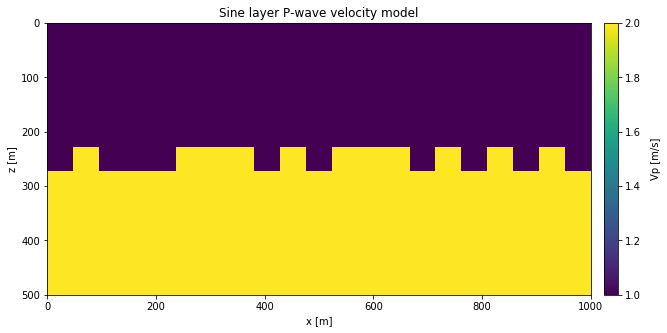

In [9]:
# Create Vp-model
vp_sine = create_sin_model(NX,NZ,dh)

# Plot Vp-model
cax = plt.imshow(vp_sine,extent=[x[0],x[-1],z[0],z[-1]], origin='lower')
plt.title("Sine layer P-wave velocity model" )
plt.xlabel("x [m]")
plt.ylabel("z [m]")
cbar = plt.colorbar(cax, orientation='vertical', pad=0.02)
cbar.set_label('Vp [m/s]', labelpad=10)
plt.gca().invert_yaxis()
plt.show()

There seem to be something wrong with this model. While there is an undulating layer interface, it does not correctly follow the defined sine-shape. The reason is a spatial undersampling of the model. Let's try a finer model discretization:

NX =  200
NZ =  100


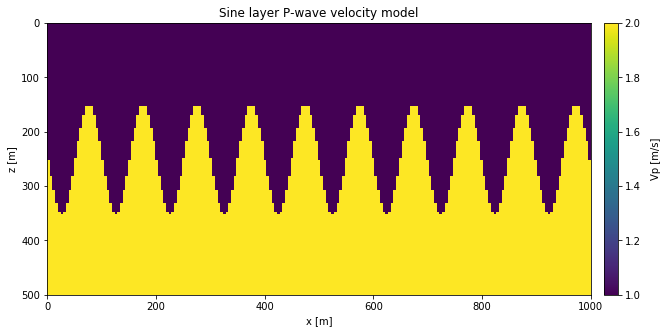

In [10]:
# Create model with finer discretization

# Define new FD grid parameters
dh1 = 5.0
Xmax = 1000.0
Zmax = 500.0

# Calculate coordinates of grid points
NX1, NZ1, x1, z1, XX1, ZZ1 = coord_def(Xmax,Zmax,dh1)

# Define model with finer discretization
vp_sine1 = create_sin_model(NX1,NZ1,dh1)

# Plot Vp-model
cax = plt.imshow(vp_sine1, extent=[x1[0],x1[-1],z1[0],z1[-1]], origin='lower')
plt.title("Sine layer P-wave velocity model" )
plt.xlabel("x [m]")
plt.ylabel("z [m]")
cbar = plt.colorbar(cax, orientation='vertical', pad=0.02)
cbar.set_label('Vp [m/s]', labelpad=10)
plt.gca().invert_yaxis()
# plt.savefig('vp_sine1.pdf', bbox_inches='tight', format='pdf')
plt.show()

Looks better, but the interface is still quite blocky. This is a serious disadvantage of  the Cartesian grid and therefore also for the finite-difference approach. We get these "stair-case" discretization errors, which become a problem in seismic modelling, because they lead to artificial diffractions. Try to minimize the stair-case artifacts by using an even finer model discretization.

## We learned:

* Creating 2D Cartesian grids and P-wave velocity models
* Visualization of discrete models
* The Cartesian grid has serious limitations to accurately discretize complex layer interfaces which not coincide with the Cartesian coordinate axes